## **Описание проекта**

**Данные для первой части**
`Файл /datasets/hypothesis.csv.`
- Hypothesis — краткое описание гипотезы;

- Reach — охват пользователей по 10-балльной шкале;

- Impact — влияние на пользователей по 10-балльной шкале;

- Confidence — уверенность в гипотезе по 10-балльной шкале;

- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
`Файл /datasets/orders.csv.`
- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

`Файл /datasets/visitors.csv.` 
- date — дата;

- group — группа A/B-теста;

- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
pd.set_option('max_rows', 15)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)
plt.style.use('seaborn-white')

In [2]:
try:
    hypothesis, orders, visitors = (
    pd.read_csv('D:/datasets/hypothesis.csv'),
    pd.read_csv('D:/datasets/orders.csv'),  
    pd.read_csv('D:/datasets/visitors.csv')  
)
except FileNotFoundError:
    print("File not found.")
except pd.errors.EmptyDataError:
    print("No data")
except pd.errors.ParserError:
    print("Parse error")
except Exception:
    print("Some other exception")

### Предобработка данных hypothesis

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
hypothesis.columns = [x.lower() for x in hypothesis.columns]

In [5]:
hypothesis.head(9)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
print('Дубликатов =', hypothesis.duplicated().sum())

Дубликатов = 0


### Предобработка данных orders

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
print("Дубликатов =", orders.duplicated().sum())

Дубликатов = 0


- С данными можно работать.

### Предобработка данных visitors

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [13]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
print('Дубликатов =', visitors.duplicated().sum())

Дубликатов = 0


- С данными можно работать.

## **Приоритизация гипотез.**

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
**Задача**
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [15]:
hypothesis.isnull().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [16]:
# ICE = (impact * confidence) / efforts
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_ICE = hypothesis[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)
hypothesis_ICE

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [17]:
# RICE = (reach * impact * confidence) / efforts
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_RICE = hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)
hypothesis_RICE

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.00
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.00
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.00
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.00
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.00


### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

In [18]:
hypothesis_result = hypothesis_ICE.merge(hypothesis_RICE, on='hypothesis', how = 'left')
hypothesis_result

,hypothesis,ICE,RICE
0,"Запустить акцию, дающую скидку на товар в день рождения",16.20,16.20
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33,40.00
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20,112.00
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00,40.00
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00,56.00
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00,4.00
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33,4.00
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12,9.00
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00,3.00


Вывод: Различия между фреймворками имеются.
- Лидеры фреймворка `ICE`: 8, 0, 7
- Лидеры фреймворка `RICE`: 7, 2, 0
- Самые заметные изменения приоритизации: ICE - 7 = 11.2 : RICE - 7 = 112; ICE - 2 = 7 : RICE - 2 = 56
- `Приоритизация изменилась`, так как в фреймворке RICE дополнительно учитывается `Reach`(cкольких пользователей затронет изменение, которое вы хотите внести)

## **Анализ A/B-теста**

- Посмотрим, сколько групп у нас учавствуют:

- 2 группы А и В

In [19]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

- В работе у нас данные за август месяц 2019 года.

In [20]:
display(orders['date'].min())
display(orders['date'].max())

Timestamp('2019-08-01 00:00:00')

Timestamp('2019-08-31 00:00:00')

- Посмотрим как разбились у нас группы:

In [21]:
group_count = (
    orders.groupby('group', as_index=False)
    .agg({'visitorId': 'count'})
)

print(group_count) 

  group  visitorId
0     A        557
1     B        640


- Пользователь, за данный промежуток времени мог бы попасть в 2 группы исследования, но мы учитываем сессии заказов, мне кажется оно не сильно повлияет на наше исследование.

Вы провели A/B-тест и получили результаты, которые описаны в файлах `/datasets/orders.csv` и `/datasets/visitors.csv.`

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

- Узнаем медиану выручки по группам, чтобы понять, что аномальных выбросов нет:

In [22]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [23]:
date_group = orders[['date', 'group']].drop_duplicates()

orders_agg = date_group.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_agg = date_group.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

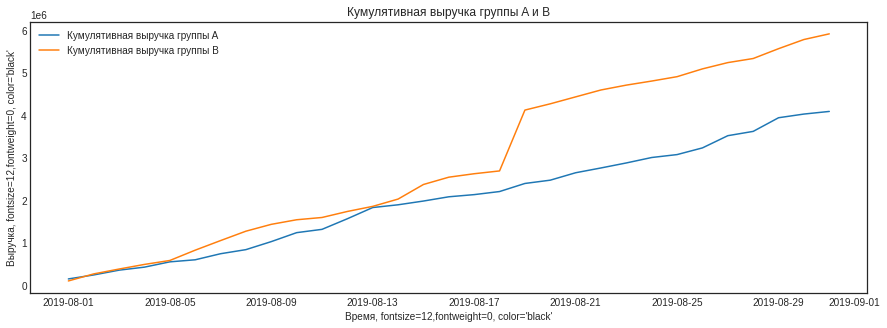

In [24]:
cumulativeData = orders_agg.merge(
    visitors_agg, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кумулятивная выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кумулятивная выручка группы B')
plt.title("Кумулятивная выручка группы A и B")
plt.xlabel("Время, fontsize=12,fontweight=0, color='black'")
plt.ylabel("Выручка, fontsize=12,fontweight=0, color='black'")
plt.legend();

- 8 августа видна точка соприкосновения групп, кумулятивная выручка была равна.
- После 18 августа сегмент Б вырвался вперед сильным скачком вверх. Возможно в этот день было очень много заказов, или количество не растет, но растет чек

### Построим график кумулятивного среднего чека по группам.

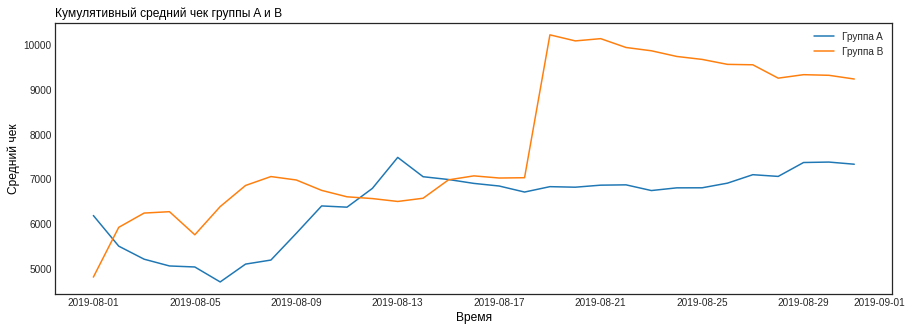

In [25]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Группа A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Группа B')
plt.title("Кумулятивный средний чек группы A и B", loc='left', fontsize=12,fontweight=3, color='black')
plt.xlabel("Время", fontsize=12,fontweight=0, color='black')
plt.ylabel("Средний чек", fontsize=12,fontweight=0, color='black')
plt.legend();

- Кумулятивное значение среднего чека 10 августа соприкачаются, после чего мы можем заметить резкий подъем среднего чека группы В. Это может быть связано с аномальным количеством покупок в этот день, либо суммами транзакций.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

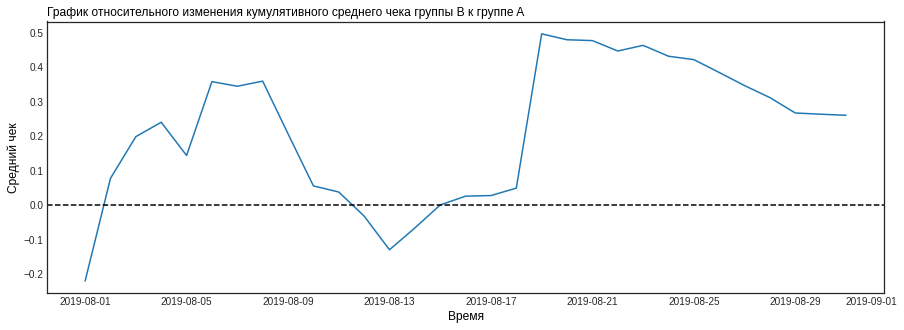

In [26]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A", loc='left', fontsize=12,fontweight=3, color='black')
plt.xlabel("Время", fontsize=12,fontweight=0, color='black')
plt.ylabel("Средний чек", fontsize=12,fontweight=0, color='black');

- Чек группы В 2го августа стал больше группы А, 8 августа упал ниже группы А, после чего заметен крупный скачек, после которого он не падал на уровень группы А.

### Построим график кумулятивной конверсии по группам.

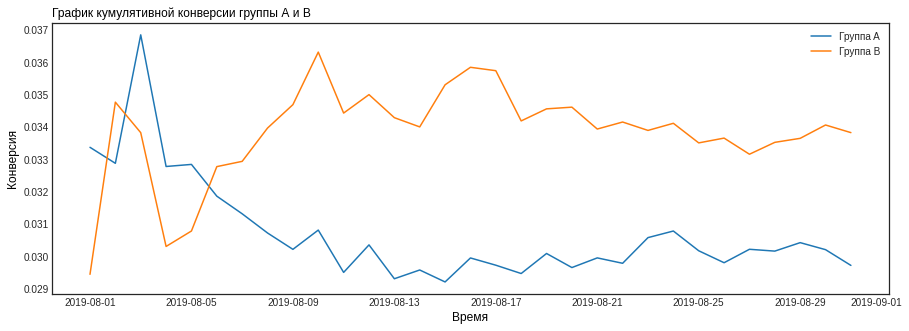

In [27]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Группа B')
plt.title("График кумулятивной конверсии группы А и В", loc='left', fontsize=12,fontweight=3, color='black')
plt.xlabel("Время", fontsize=12,fontweight=0, color='black')
plt.ylabel("Конверсия", fontsize=12,fontweight=0, color='black')
plt.legend();

- Пик группы А больше группы В, но после 6го конверсия группы В значительно ушла вверх, с подъемами 9го и 15 августа, после конверсии групп нормализовались. График показал, что конверсия группы В значительно выше группы А.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

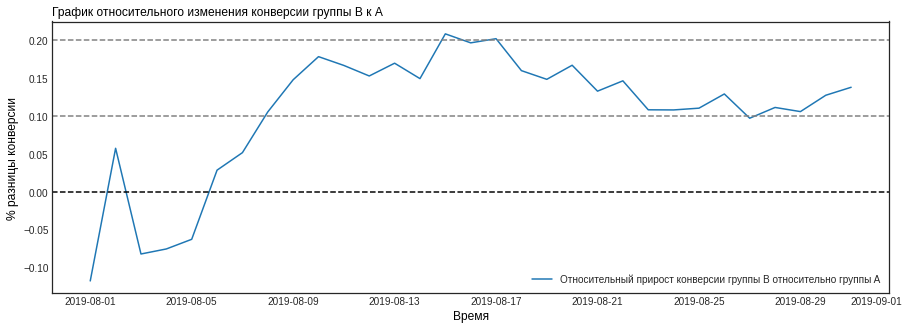

In [28]:
register_matplotlib_converters()
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.title("График относительного изменения конверсии группы В к А", loc='left', fontsize=12,fontweight=3, color='black')
plt.xlabel("Время", fontsize=12,fontweight=0, color='black')
plt.ylabel("% разницы конверсии", fontsize=12,fontweight=0, color='black')
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--');

- Как и на графике кумулятивной конверсии групп, мы можем заметить, что после 5 августа конверсия группы В пошла вверх и была выше конверсии группы А больше 10%.

### Построим точечный график количества заказов по пользователям. 

- transactionId — идентификатор заказа;

- visitorId — идентификатор пользователя, совершившего заказ;

- date — дата, когда был совершён заказ;

- revenue — выручка заказа;

- group — группа A/B-теста, в которую попал заказ.

In [46]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


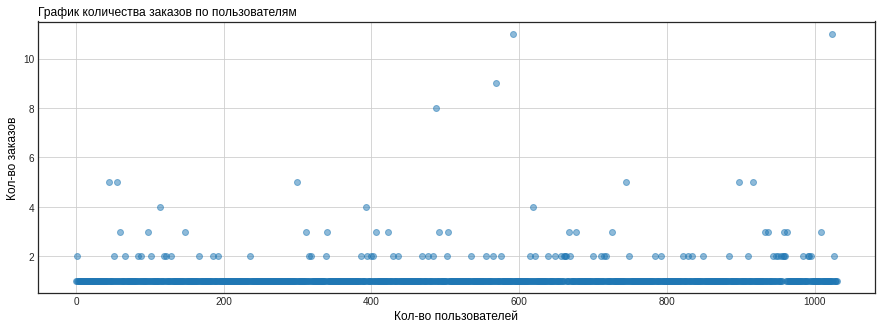

In [29]:
orders_grap = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_grap['count'] = range(1, len(orders_grap)+1)
orders_grap
x_values = pd.Series(range(0,len(orders_grap)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям', loc='left', fontsize=12,fontweight=3, color='black')
plt.xlabel("Кол-во пользователей", fontsize=12,fontweight=0, color='black')
plt.ylabel("Кол-во заказов", fontsize=12,fontweight=0, color='black')
plt.scatter(x_values, orders_grap['transactionId'], alpha=0.5);

- В основном пользватели делают 1 заказ, меньшее кол-во поьзователей делает 2 заказа, но их все же много. Есть выбросы где пользователи делают 8, 9, 10 и 11 заказов.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [42]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [43]:
orders_users

,user_id,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [30]:
orders_users = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

orders_users.columns = ['user_id','orders']

print('Значения перцентиля: 95 и 99: ',np.percentile(orders_users['orders'], [95, 99]))

Значения перцентиля: 95 и 99:  [2. 4.]


- Выведем все процентили, для более точной информации:

In [31]:
print('Значения перцентиля c 95 по 99: ', np.percentile(orders_users['orders'], [95,96,97,98, 99])) 

Значения перцентиля c 95 по 99:  [2. 2. 2. 3. 4.]


- Можно сделать вывод, что практически все пользователи совершают небольше 2 покупок, значения выше - аномалия.

In [44]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


### Построим точечный график стоимостей заказов.

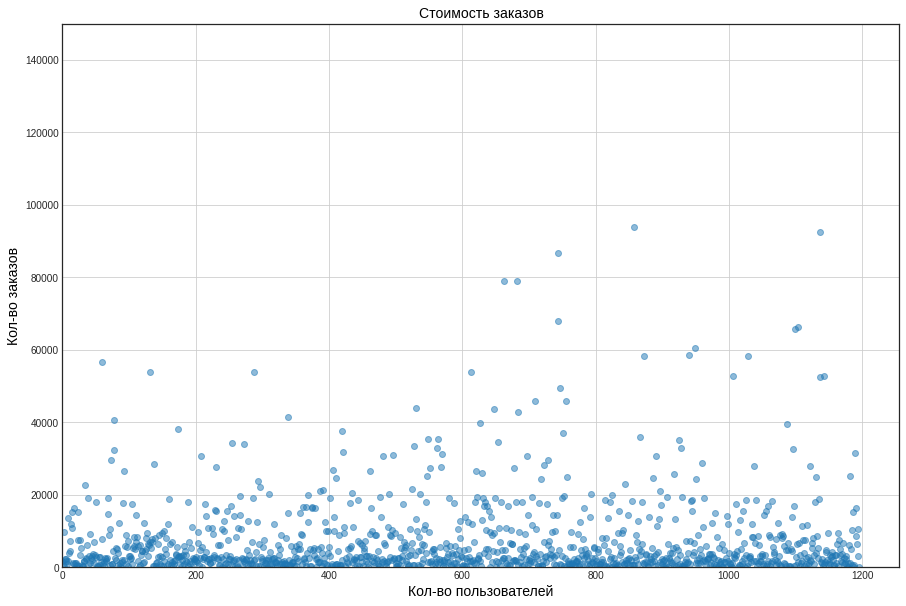

In [32]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,10))
plt.grid()
plt.title('Стоимость заказов', fontsize=14,fontweight=3, color='black')
plt.xlabel("Кол-во пользователей", fontsize=14,fontweight=0, color='black')
plt.ylabel("Кол-во заказов", fontsize=14,fontweight=0, color='black')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.ylim(0, 150000)
plt.xlim(0, None);

- Для более комфортного вида графика, уберем из выборки заказ стоимость 1.2млн

- На данном графике заметны аномальные выбросы выше 50 000, в основном стоимость не превышает 10 000.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [33]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


- Только у 1% стоимость заказов равна`99` перцентиль - `58 233`, не более чем `5%` пользователей заказы дороже `28 000`.


- Границей заказов будет 99 процентиль, то есть стоимость заказов выше 58 233 и не более 2х заказов

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [34]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# объединим все в одну таблицу
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


**Гипотезы:**
alpha = 0.05
- `h0:` различий в конверсии между группами нет. 
- `h1:` различия в конверсии между группами есть.
- Используем непараметрический тест Уилкоксона-Манна-Уитни:

Ключевая идея — проранжировать две выборки по порядку от меньшего кбольшему и сравнить ранги одних и тех же значений, попавших в обе выборки.

SampleA сохранили выборку, где каждый элемент — число заказов определённого пользователя, в том числе ноль. Значит, число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём конверсию группы B: SampleB.mean().

- Выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1. Округлим до трёх знаков после запятой.

In [35]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительная разница между группой B и А = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.017
Относительная разница между группой B и А = 0.138


- Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выйгрыш группы B равен 13.8% — второе число в выводе.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Гипотезы:**
alpha = 0.05
- `h0:` статистических различий в среднем чеке между группами нет. 
- `h1:` различия в среднем чеке между группами есть.
- Используем непараметрический тест Уилкоксона-Манна-Уитни:

Ключевая идея — проранжировать две выборки по порядку от меньшего кбольшему и сравнить ранги одних и тех же значений, попавших в обе выборки.

In [36]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Статистическая разница между группой B и А = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value = 0.729
Статистическая разница между группой B и А = 0.259


- `P-value` значительно больше 0.05 = `0.729`. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A.

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

Примем за аномальных пользователей тех, кто совершил `больше 2 заказов` или совершил заказ `дороже 58 233` рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.

In [37]:
# Потолок заказов
order_ceiling = 2
# Потолок суммы
amount_ceiling = 58233


usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_ceiling]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_ceiling]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > amount_ceiling]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Кол-во больших заказов:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
23      237748145
37      249864742
68      457167155
dtype: int64
Кол-во больших заказов: 31


Всего `31` аномальных пользователей.

- Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

- Проверим насколько сильно различаются показатели данных чистых данных с исходными 

In [38]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

**Применим статистический критерий Манна-Уитни к полученным выборкам:**

In [39]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительная разница между группой B и А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.010
Относительная разница между группой B и А = 0.174


- `P-value = 0.01` меньше 0.05. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, - отвергаем. Это значит: и по «очищенным» данным различия в конверсии групп A и B есть. `Разница группы В к А = 17.4%`
- Относительная разница между группами в результате удаления выбросов выросла на `3.6%`

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

In [40]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [41]:
print('p-value ='
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Статистическая разница между группой B и А ='
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value =0.798
Статистическая разница между группой B и А =-0.020


- Значение p-value = 0.798, что больше 0.05, причин отвергать нулевую гипотезу, что в среднем чеке есть различия, нет. Также средний чек группы В оказался ниже на 2%, когда в сырых данных он был больше на 25%.

### Вывод

- Данные показали, что средний чек группы В в результате удаления аномалий оказался ниже группы А на 2%, всему виной заказ стоимостью 1.2млн.


- Конверсия групп показала, что различия есть и в сырых данных, и в чистых. При удалении аномалий, разница вырасла на 3.6% в пользу группы В.


- Сделаем вывод, что не смотря на примерно одинаковый средний чек групп, конверсия группы В оказалась успешнее, из чего мы можем остановить тест и констатировать успех группы В.